In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def get_wall_z_image(Z_val, fx, fy, cx, cy, szx, szy):
  Z = Z_val*np.ones((szy, szx), dtype=np.float32)
  return Z

def get_road_z_image(H_val, fx, fy, cx, cy, szx, szy):
  y = np.arange(szy).reshape(-1,1)*1.
  y = np.tile(y, (1, szx))
  Z = np.zeros((szy, szx), dtype=np.float32)
  Z[y > cy] = H_val*fy / (y[y>cy]-cy)
  Z[y <= cy] = np.NaN
  return Z

def plot_optical_flow(ax, Z, u, v, cx, cy, szx, szy, s=16):
  # Here is a function for plotting the optical flow. Feel free to modify this 
  # function to work well with your inputs, for example if your predictions are
  # in a different coordinate frame, etc.
  
  x, y = np.meshgrid(np.arange(szx), np.arange(szy))
  ax.imshow(Z, alpha=0.5, origin='upper')
  q = ax.quiver(x[::s,::s], y[::s,::s], u[::s,::s], -v[::s, ::s])
#   ax.quiverkey(q, X=0.5, Y=0.9, U=20, 
#                label='Quiver key length = 20', labelpos='N')
  ax.axvline(cx)
  ax.axhline(cy)
  ax.set_xlim([0, szx])
  ax.set_ylim([szy, 0])
  ax.axis('equal')

In [4]:
# Focal length along X and Y axis. In class we assumed the smae focal length 
# for X and Y axis. but in general they could be different. We are denoting 
# these by fx and fy.
fx = fy = 128.

# Size of the image
szy = 256
szx = 384

# Center of the image. We are going to assume that the principal point is at 
# the center of the image.
cx = 192
cy = 128

# Gets the image of a wall 2m in front of the camera.
Z1 = get_wall_z_image(2., fx, fy, cx, cy, szx, szy)


# Gets the image of the ground plane that is 3m below the camera.
Z2 = get_road_z_image(3., fx, fy, cx, cy, szx, szy)

# fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,7))
# ax1.imshow(Z1)
# ax2.imshow(Z2)

# # Plotting function.
# f = plt.figure(figsize=(13.5,9))
# u = np.random.rand(*Z1.shape)
# v = np.random.rand(*Z1.shape)
# plot_optical_flow(f.gca(), Z2, u, v, cx, cy, szx, szy, s=10)
# f.savefig('optical_flow_output.pdf', bbox_inches='tight')

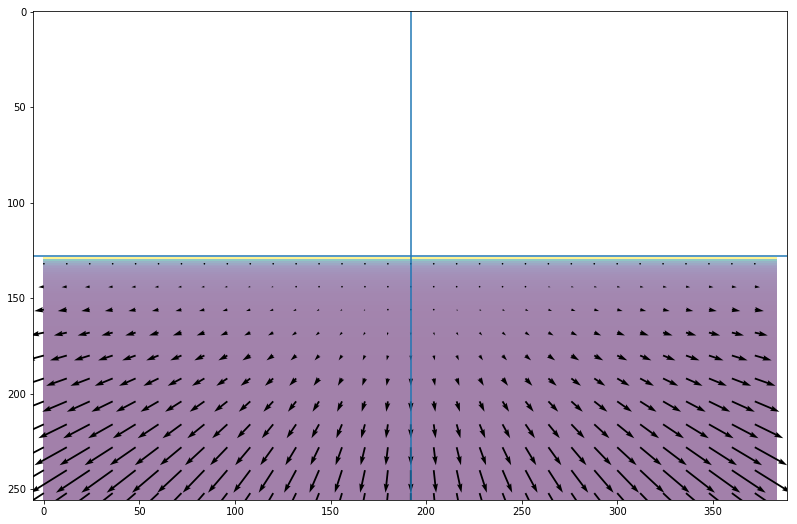

In [5]:
# looking forward on a horizontal plane while driving on a flat road
u = np.random.rand(*Z2.shape)
v = np.random.rand(*Z2.shape)
t = np.array([[0],[0],[1]])
w = np.array([[0],[0],[0]])
for y in range(szy):
    for x in range(szx):
        x1 = x - cx
        y1 = y - cy
        u[y,x] = 1/Z2[y,x]*np.array([[-fx, 0, x1]]).dot(t) + np.array([[x1*y1/fx, -(fx+x1**2/fx), y1]]).dot(w)
        v[y,x] = 1/Z2[y,x]*np.array([[0, -fy, y1]]).dot(t) + np.array([[(fy+y1**2/fy), -x1*y1/fy, -x1]]).dot(w)
# Plotting function.
f = plt.figure(figsize=(13.5,9))
plot_optical_flow(f.gca(), Z2, u, v, cx, cy, szx, szy, s=12)
f.savefig('optical_flow_output1.pdf', bbox_inches='tight')


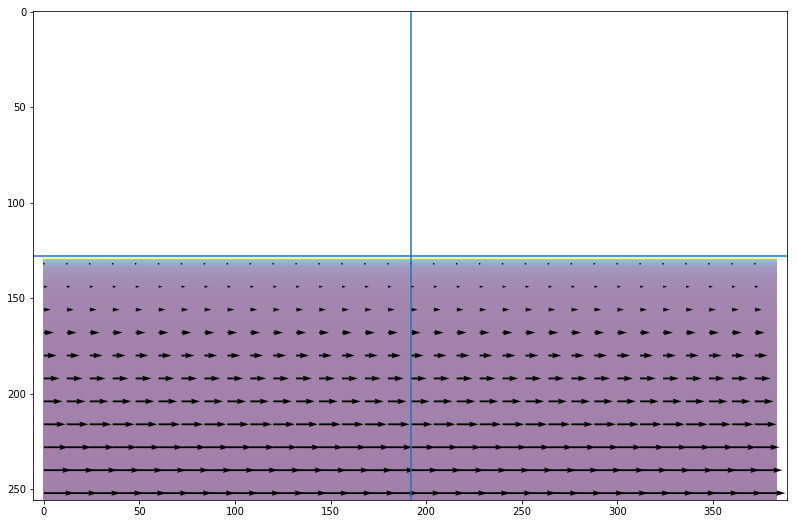

In [6]:
# Sitting in a train and looking out over a flat field from a side window
u = np.random.rand(*Z2.shape)
v = np.random.rand(*Z2.shape)
t = np.array([[1],[0],[0]])
w = np.array([[0],[0],[0]])
for y in range(szy):
    for x in range(szx):
        x1 = x - cx
        y1 = y - cy
        u[y,x] = 1/Z2[y,x]*np.array([[-fx, 0, x1]]).dot(t) + np.array([[x1*y1/fx, -(fx+x1**2/fx), y1]]).dot(w)
        v[y,x] = 1/Z2[y,x]*np.array([[0, -fy, y1]]).dot(t) + np.array([[(fy+y1**2/fy), -x1*y1/fy, -x1]]).dot(w)
# Plotting function.
f = plt.figure(figsize=(13.5,9))
plot_optical_flow(f.gca(), Z2, u, v, cx, cy, szx, szy, s=12)
f.savefig('optical_flow_output2.pdf', bbox_inches='tight')


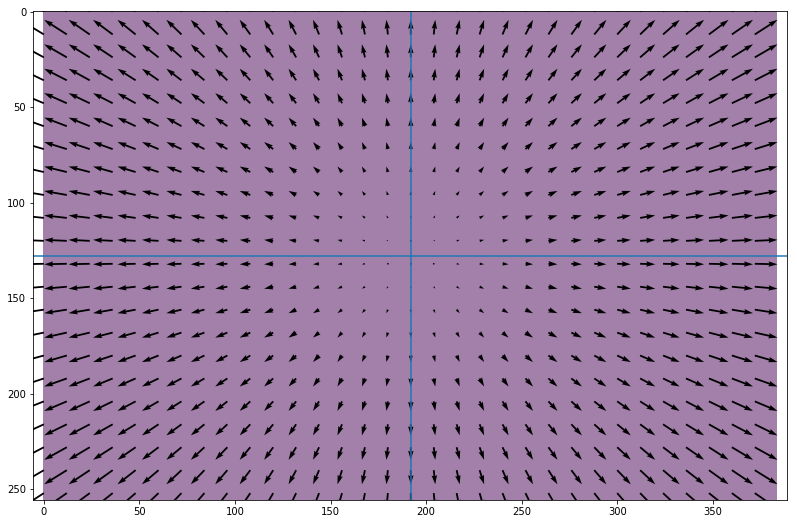

In [7]:
# Flying into a wall head-on.
u = np.random.rand(*Z1.shape)
v = np.random.rand(*Z1.shape)
t = np.array([[0],[0],[1]])
w = np.array([[0],[0],[0]])
for y in range(szy):
    for x in range(szx):
        x1 = x - cx
        y1 = y - cy
        u[y,x] = 1/Z1[y,x]*np.array([[-fx, 0, x1]]).dot(t) + np.array([[x1*y1/fx, -(fx+x1**2/fx), y1]]).dot(w)
        v[y,x] = 1/Z1[y,x]*np.array([[0, -fy, y1]]).dot(t) + np.array([[(fy+y1**2/fy), -x1*y1/fy, -x1]]).dot(w)
# Plotting function.
f = plt.figure(figsize=(13.5,9))
plot_optical_flow(f.gca(), Z1, u, v, cx, cy, szx, szy, s=12)
f.savefig('optical_flow_output3.pdf', bbox_inches='tight')


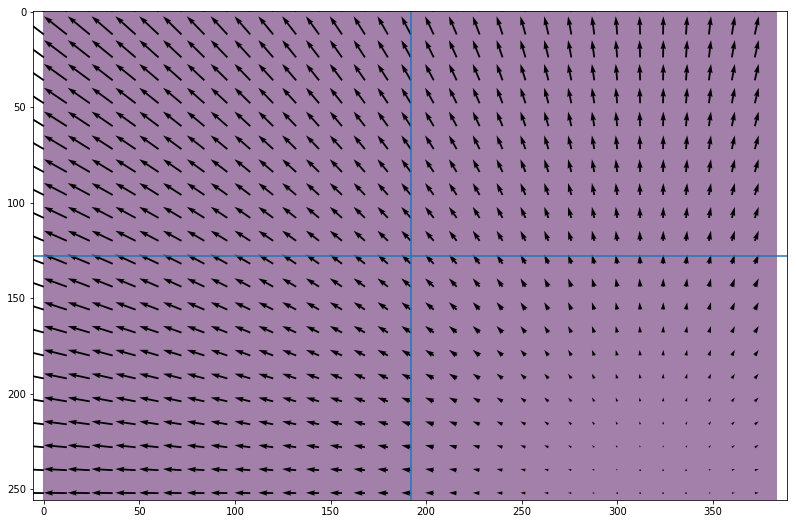

In [8]:
# Flying into a wall but also translating horizontally, and vertically.
u = np.random.rand(*Z1.shape)
v = np.random.rand(*Z1.shape)
t = np.array([[1],[1],[1]])
w = np.array([[0],[0],[0]])
for y in range(szy):
    for x in range(szx):
        x1 = x - cx
        y1 = y - cy
        u[y,x] = 1/Z1[y,x]*np.array([[-fx, 0, x1]]).dot(t) + np.array([[x1*y1/fx, -(fx+x1**2/fx), y1]]).dot(w)
        v[y,x] = 1/Z1[y,x]*np.array([[0, -fy, y1]]).dot(t) + np.array([[(fy+y1**2/fy), -x1*y1/fy, -x1]]).dot(w)
# Plotting function.
f = plt.figure(figsize=(13.5,9))
plot_optical_flow(f.gca(), Z1, u, v, cx, cy, szx, szy, s=12)
f.savefig('optical_flow_output4.pdf', bbox_inches='tight')


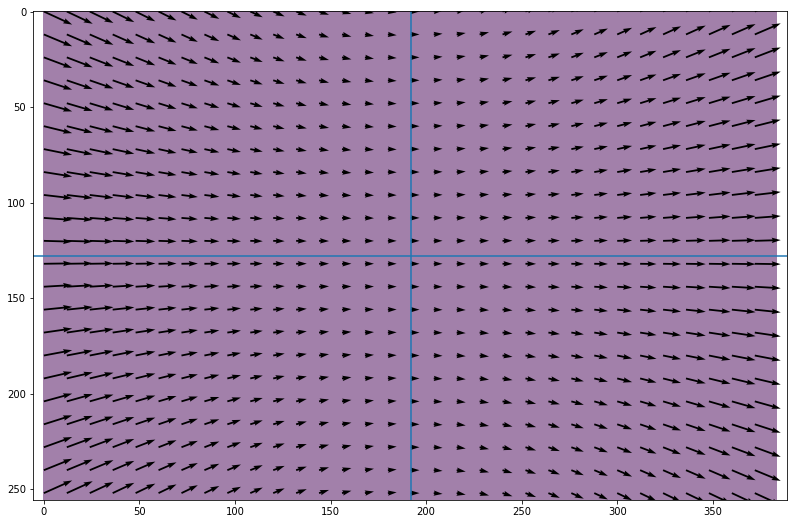

In [9]:
# Counter-clockwise rotating in front of a wall about the Y-axis.
u = np.random.rand(*Z1.shape)
v = np.random.rand(*Z1.shape)
t = np.array([[0],[0],[0]])
w = np.array([[0],[-1],[0]])
for y in range(szy):
    for x in range(szx):
        x1 = x - cx
        y1 = y - cy
        u[y,x] = 1/Z1[y,x]*np.array([[-fx, 0, x1]]).dot(t) + np.array([[x1*y1/fx, -(fx+x1**2/fx), y1]]).dot(w)
        v[y,x] = 1/Z1[y,x]*np.array([[0, -fy, y1]]).dot(t) + np.array([[(fy+y1**2/fy), -x1*y1/fy, -x1]]).dot(w)
# Plotting function.
f = plt.figure(figsize=(13.5,9))
plot_optical_flow(f.gca(), Z1, u, v, cx, cy, szx, szy, s=12 )
f.savefig('optical_flow_output5.pdf', bbox_inches='tight')
